Corinne Orton 7-21<br><br>
A file to create embeddings using any transform in transforms.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from transforms import *
from transforms import get_embedding


In [20]:
from transforms import get_embedding

### Load data ###

#### CAFs ####

In [2]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
expr = pd.read_csv(path + 'data/CAFs.txt', sep='\t')
print(expr.iloc[0:4,0:4])
X_train = expr.values[:,0:(expr.shape[1]-1)]
X_train = np.log(X_train + 1)
n = X_train.shape[0]
print("\nThis data set contains " + str(n) + " samples")
y_train = expr.values[:,expr.shape[1]-1]
print("\nDimensions of the  data set: ")
print(X_train.shape, y_train.shape)

                1110020A21Rik  1110046J04Rik  1190002F15Rik  1500015A07Rik
SS2_15_0048_A3            0.0            0.0            0.0            0.0
SS2_15_0048_A6            0.0            0.0            0.0            0.0
SS2_15_0048_A5            0.0            0.0            0.0            0.0
SS2_15_0048_A4            0.0            0.0            0.0            0.0

This data set contains 716 samples

Dimensions of the  data set: 
(716, 557) (716,)


### Embed ###

In [7]:
y = get_embedding(X_train, "tsne")

### Plot ###

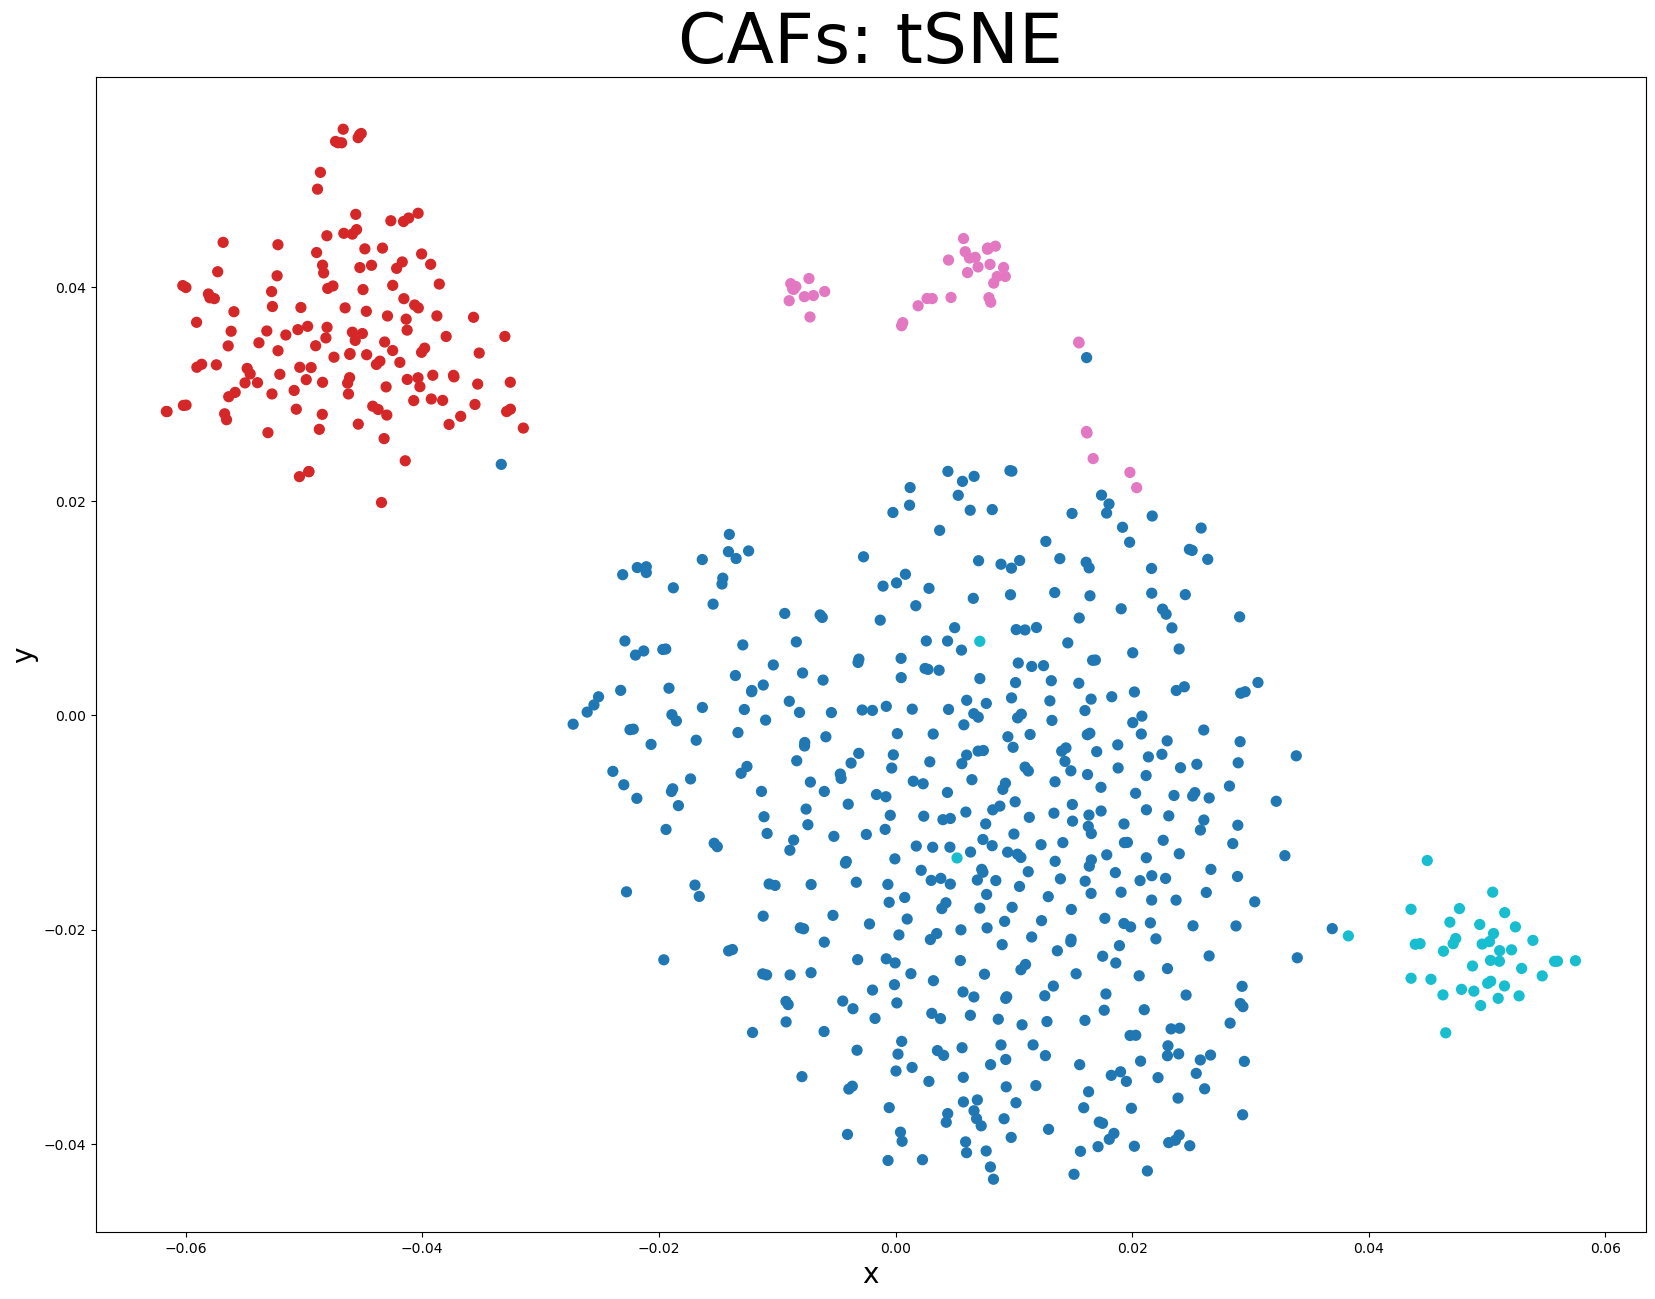

In [8]:
plt.figure(figsize=(20,15))
#colors = ['#0517b3','#b16ce6','#03934a','#36b4f7','#980503'] # cell mix
#colors = ['#17329f','#98034c','#03934a','#6ebac3'] # CAFs
#mapped_colors = [colors[int(value-1)] for value in y_train]
#plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors)
plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10') # RNA
# tSNE_PCA: \u03B1 = 0.75
plt.title("CAFs: tSNE", fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()

### Save file ###

In [5]:
emb_path = path + 'embeddings/'

In [9]:
np.save(emb_path + 'CAFs_tsne.npy', y)